Source - https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Implementing Kernel SVM with Scikit-Learn

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-lenth', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
irisdata.head()

,sepal-length,sepal-width,petal-lenth,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [19]:
def plot_data(x, y, xlabel, ylabel):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

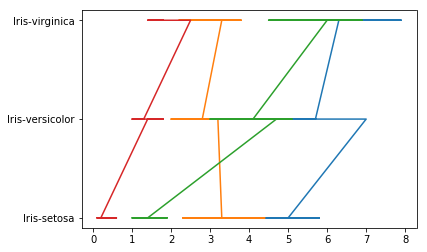

In [20]:
plot_data(X, y, '', '')

In [21]:
# Split of data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

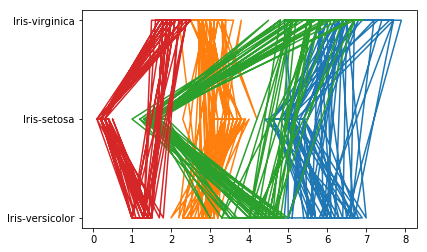

In [22]:
plot_data(X_train, y_train, '', '')

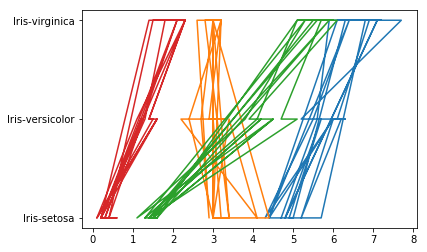

In [32]:
plot_data(X_test, y_test, '', '')

### 1) Polynomial Kernel

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
# Prediction
y_pred = svclassifier.predict(X_test)

In [25]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### 2) Gaussian Kernel

In [26]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
# Prediction
y_pred = svclassifier.predict(X_test)

In [28]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



### 3) Sigmoid Kernel

In [29]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'sigmoid')
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
# Prediction
y_pred = svclassifier.predict(X_test)  

In [31]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 0 11  0]
 [ 0  9  0]
 [ 0 10  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.30      1.00      0.46         9
 Iris-virginica       0.00      0.00      0.00        10

      micro avg       0.30      0.30      0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Observations

##### 1) Sigmoid kernel performs worst - This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.
##### 2) Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. 
##### However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.